In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df = pd.read_csv("KDDTrain+.csv", names = feature)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,27,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,9,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,2,12,6,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,2,19,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,2,19,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [16]:
for i in range(np.shape(features)[1]):
    if(np.std(features[:,i])!=0):
        features[:,i] = (features[:,i]-np.mean(features[:,i]))/np.std(features[:,i]) 
    else:
        features[:,i] = (features[:,i]-np.mean(features[:,i]))
np.shape(features)

(125973, 41)

In [17]:
np.shape(features),np.shape(labels)

((125973, 41), (125973,))

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
train_X, test_X , train_Y ,test_Y = train_test_split(features,labels,random_state = 42,test_size = 0.1)

In [20]:
print(np.shape(train_X),np.shape(test_X),np.shape(train_Y),np.shape(test_Y))

(113375, 41) (12598, 41) (113375,) (12598,)


# Stacked Convolutional Auto Encoder

### First Stack

In [21]:
from keras.layers import *
from keras.models import Model
from keras_self_attention import SeqSelfAttention

In [22]:
batch_size = 128
input_dim = (np.shape(train_X)[1],1)
input_layer = Input(shape=input_dim, name='input')
#Input Layer
encoder1 = Conv1D (64,3)(input_layer)
encoder1 = MaxPooling1D(2)(encoder1)
#Encoder’s first dense layer
encoder2 = Conv1D (32,3)(encoder1)
encoder2 = MaxPooling1D(2)(encoder2)
# Code layer
latent_layer = Dense (32, name = 'latent_1')(encoder2)
# Decoder’s first dense layer
decoder1 = Conv1DTranspose (32,3)(latent_layer)
decoder1 = UpSampling1D(2)(decoder1)
# Decoder’s Third dense layer
decoder2 = Conv1DTranspose (64,3)(decoder1)
decoder2 = UpSampling1D(2)(decoder2)
flatten = Flatten()(decoder2)
# Output Layer
output_layer = Dense(input_dim[0])(flatten)
output_layer = Reshape((np.shape(train_X)[1],1), input_shape=(np.shape(train_X)[1],))(output_layer)

In [23]:
autoencoder_1 = Model(inputs=input_layer, outputs=output_layer)
autoencoder_1.compile(metrics=tf.keras.metrics.RootMeanSquaredError(),loss='mse',optimizer='adam')

In [24]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 41, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 39, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 32)            0         
 1D)                                                             
                                                                 
 latent_1 (Dense)            (None, 8, 32)             1056  

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [27]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
886/886 [==============================] - 8s 9ms/step - loss: 0.2011 - root_mean_squared_error: 0.4484 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3518
Epoch 2/100
886/886 [==============================] - 8s 9ms/step - loss: 0.2408 - root_mean_squared_error: 0.4907 - val_loss: 0.0674 - val_root_mean_squared_error: 0.2597
Epoch 3/100
886/886 [==============================] - 8s 9ms/step - loss: 0.1257 - root_mean_squared_error: 0.3545 - val_loss: 0.0930 - val_root_mean_squared_error: 0.3050
Epoch 4/100
886/886 [==============================] - 8s 9ms/step - loss: 0.3343 - root_mean_squared_error: 0.5782 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2924
Epoch 5/100
886/886 [==============================] - 8s 9ms/step - loss: 0.1751 - root_mean_squared_error: 0.4184 - val_loss: 0.0501 - val_root_mean_squared_error: 0.2237
Epoch 6/100
886/886 [==============================] - 8s 9ms/step - loss: 0.0755 - root_mean_squared_error: 0.2748 - val_loss: 0.0331 

In [28]:
pred = autoencoder_1.predict(features)

3937/3937 [==============================] - 12s 3ms/step


In [29]:
np.shape(pred)

(125973, 41, 1)

In [30]:
from sklearn.metrics import *
import keras

In [31]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(features)

3937/3937 [==============================] - 6s 1ms/step


### Classifier Model

In [32]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1:]
input_layer = Input(shape=(input_dim), name='input')
flatten = Flatten()(input_layer)
#Input Layer
dense1 = Dense (128, activation='relu')(flatten)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [33]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [34]:
classify.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8, 32)]           0         
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 41,717
Trainable params: 41,717
Non-trainable

In [35]:
train_X, test_X , train_Y ,test_Y = train_test_split(intermediate_output_1,labels,random_state = 42,test_size = 0.1)

In [36]:
history = classify.fit(train_X, train_Y, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_X, test_Y))

Epoch 1/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0886 - accuracy: 0.9745 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 2/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0434 - val_accuracy: 0.9864
Epoch 3/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 4/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9921
Epoch 5/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0288 - val_accuracy: 0.9915
Epoch 6/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 7/100
3543/3543 [==============================] - 8s 2ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0258 - val_ac

In [38]:
preds = classify.predict(test_X)

394/394 [==============================] - 1s 1ms/step


In [39]:
np.shape(preds),np.shape(test_Y)

((12598, 5), (12598,))

In [40]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [41]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), test_Y)

In [42]:
print(accuracy_score(np.argmax(preds,axis = 1),test_Y))
print(precision_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),test_Y,average = 'macro'))

0.99476107318622
0.7658625736468931
0.7889818197538411
0.776754239419633


In [43]:
import seaborn as sns

<AxesSubplot:>

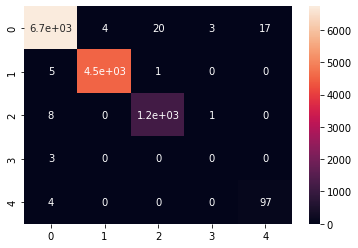

In [44]:
sns.heatmap(conf_mat, annot=True)